#     Nícolas Telles -  Análise das Olimpíadas até 2016



   <img src="olimpiadas.png"> 
   
   #### Essa análise tem como objetivo identificar as características(físicas) e possíveis comportamentos de grandes vencedores tanto individuais como coletivos, tanto como identificar se há discrepância MASCULINO x FEMININO ####


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_olimpiadas = pd.read_csv('athlete_events.csv')

df_olimpiadas.info()

## Limpando a base pra facilitar a análise

#### Amostragem para verificar como estão os dados ####


In [4]:
df_olimpiadas.sample()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
231589,116186,Yuta Suenaga,M,23.0,178.0,72.0,Japan,JPN,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Breaststroke,NaN


#### Verificando quais são os dados nulos ####

In [5]:
df_olimpiadas.isnull().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

 #### Coluna Medal com 'NaN' - vou substituir por 'Sem Pódio' ####


In [11]:
df_olimpiadas['Medal'] = df_olimpiadas['Medal'].fillna('Sem Pódio')
df_olimpiadas.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Sem Pódio
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Sem Pódio
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Sem Pódio
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Sem Pódio


#### Atribuindo a média de altura e peso aos valores nulos ####

In [12]:
mediah = df_olimpiadas['Height'].mean()
mediah

175.3389698736043

In [13]:
mediaw = df_olimpiadas['Weight'].mean()
mediaw

70.70239290055207

In [14]:
df_olimpiadas['Height'] = df_olimpiadas['Height'].fillna(mediah)
df_olimpiadas['Weight'] = df_olimpiadas['Weight'].fillna(mediaw)
#df_olimpiadas['Height'].mean()

In [15]:
df_olimpiadas.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Sem Pódio
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Sem Pódio
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Sem Pódio
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Sem Pódio


###  Ranking de Países por *quantidade* de medalhas
    - Ouro 
    - Prata 
    - Bronze

In [91]:
df_olimpiadas[df_olimpiadas['Medal'] == 'Gold']['Team'].value_counts().head(10)

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Team, dtype: int64

In [93]:
df_olimpiadas[df_olimpiadas['Medal'] == 'Silver']['Team'].value_counts().head(10)

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
Italy             508
Sweden            476
Australia         453
Canada            413
Russia            351
Name: Team, dtype: int64

In [94]:
df_olimpiadas[df_olimpiadas['Medal'] == 'Bronze']['Team'].value_counts().head(10)

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
Australia         511
Sweden            507
Italy             484
Finland           415
Canada            408
Name: Team, dtype: int64

### Vou verificar quais são os maiores campeões e se existe algum padrão de comportamento. ###

In [16]:
df_olimpiadas[df_olimpiadas['Medal'] == 'Gold']['Name'].value_counts().head(10)

Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Larysa Semenivna Latynina (Diriy-)                  9
Frederick Carlton "Carl" Lewis                      9
Paavo Johannes Nurmi                                9
Mark Andrew Spitz                                   9
Birgit Fischer-Schmidt                              8
Usain St. Leo Bolt                                  8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Ole Einar Bjrndalen                                 8
Name: Name, dtype: int64

#### Nota-se que o o maior número de participantes está na casa entre 20 e 30 anos , ou seja o auge da carreira

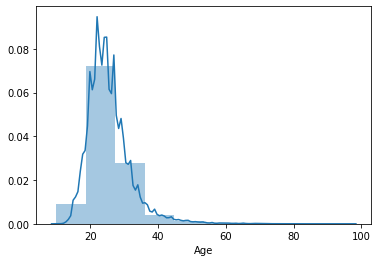

In [50]:
sns.distplot(df_olimpiadas['Age'], bins = 10)

### Vamos ver se a informação anterior condiz com o maior medalhista olímpico

<img src="michael-phelps-pequim-2008.jpg"> 


In [53]:
df_olimpiadas[df_olimpiadas['Name'] == 'Michael Fred Phelps, II']['Age']

187887    15.0
187888    19.0
187889    19.0
187890    19.0
187891    19.0
187892    19.0
187893    19.0
187894    19.0
187895    19.0
187896    23.0
187897    23.0
187898    23.0
187899    23.0
187900    23.0
187901    23.0
187902    23.0
187903    23.0
187904    27.0
187905    27.0
187906    27.0
187907    27.0
187908    27.0
187909    27.0
187910    27.0
187911    31.0
187912    31.0
187913    31.0
187914    31.0
187915    31.0
187916    31.0
Name: Age, dtype: float64

In [54]:
df_olimpiadas[(df_olimpiadas['Name'] == 'Michael Fred Phelps, II') & (df_olimpiadas['Medal'] != 'Sem Pódio')]['Age']

187888    19.0
187889    19.0
187890    19.0
187891    19.0
187892    19.0
187893    19.0
187894    19.0
187895    19.0
187896    23.0
187897    23.0
187898    23.0
187899    23.0
187900    23.0
187901    23.0
187902    23.0
187903    23.0
187904    27.0
187905    27.0
187906    27.0
187907    27.0
187908    27.0
187910    27.0
187911    31.0
187912    31.0
187913    31.0
187914    31.0
187915    31.0
187916    31.0
Name: Age, dtype: float64

### Média da idade do Felps nas Olimpíadas

In [55]:
df_olimpiadas[(df_olimpiadas['Name'] == 'Michael Fred Phelps, II') & (df_olimpiadas['Medal'] != 'Sem Pódio')]['Age'].mean()

24.428571428571427

### MASCULINO X FEMININO ###

#### Note que existe uma leve discrepância de ganho de medalhas em relação ao gênero , todavia devido ao fato de mais homens participarem ou o fato de dos homens competem em provas individuais participarem de mais provas, como é o caso da Natação onde o atleta pode disputar diversas modalidades

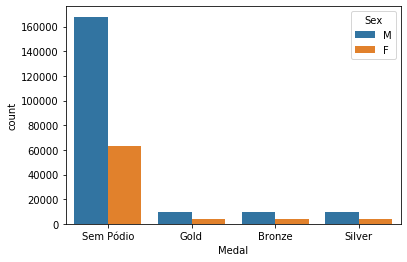

In [26]:
    sns.countplot(x = 'Medal', hue = 'Sex', data = df_olimpiadas)

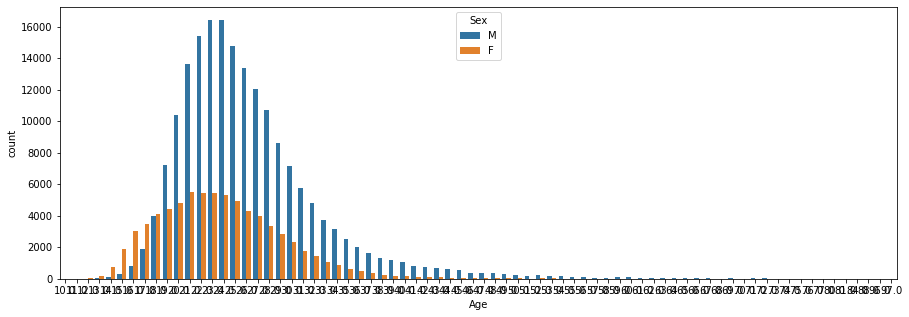

In [86]:
plt.figure(figsize = (15,5))
sns.countplot(x ='Age', hue = 'Sex' , data = df_olimpiadas)

### Insights  e suposições do gráfico acima:

        - Única idade +- igualada entre os dois gêneros é por volta de 18 anos.
        - Mulheres vão para as Olimpíadas mais cedo do que os homens. Possíveis causas;:
            - Modalidade praticada alinhada ao porte fisíco. Ex: Ginástica || Quanto mais nova ou menor mais perfeitos os movimentos executados ? 
         - Homens demoram mais pra amadurecer, atingem seu auge mais tarde ?
         - Homens tem carreira mais longa e ficam em seu auge por mais tempo que as mulhres? 
       Então o se uma mulher deseja se destacar numa Olimpíada é prefirível que comece desde criança?? 
       - Maior incentivo a esporte coletivos masculinos em relação aos femininos,  o que torna também um dos fatores  dessa discrepância?

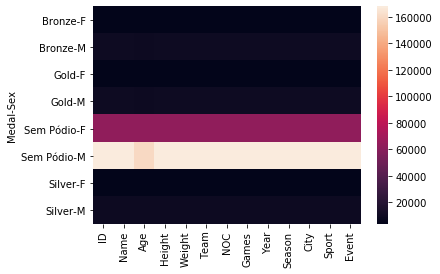

In [110]:
medalsex = df_olimpiadas.groupby(by=['Medal','Sex']).count()
sns.heatmap(medalsex)

In [18]:
df_olimpiadas[df_olimpiadas['Sex'] == 'M'].count()['Sex']


196594

In [19]:
df_olimpiadas[df_olimpiadas['Sex'] == 'F'].count()['Sex']

74522

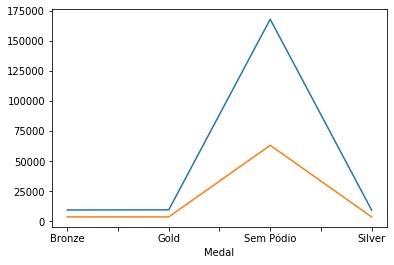

In [27]:
df_olimpiadas[df_olimpiadas['Sex'] == 'M'].groupby('Medal').count()['Sex'].plot(kind = 'bar')
df_olimpiadas[df_olimpiadas['Sex'] == 'F'].groupby('Medal').count()['Sex'].plot()

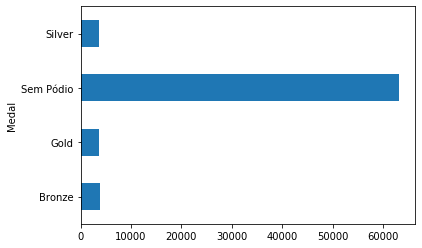

In [103]:
df_olimpiadas[df_olimpiadas['Sex'] == 'F'].groupby('Medal').count()['Sex'].plot(kind = 'barh')

### DREAM TEAM 92 ###


<img src="dreamteams.jpg">

In [21]:
dreamteam = df_olimpiadas[(df_olimpiadas['Sport'] == 'Basketball') &  (df_olimpiadas['Year'] == 1992) &  (df_olimpiadas['Sex'] == 'M') &  (df_olimpiadas['Medal'] == 'Gold')]

In [90]:
dreamteam

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
14656,7901,Charles Wade Barkley,M,29.0,198.0,114.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
22150,11668,Larry Joe Bird,M,35.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
58646,30009,Clyde Austin Drexler,M,30.0,200.0,101.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
65566,33553,Patrick Aloysius Ewing,M,29.0,213.0,109.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
109625,55424,"Earvin ""Magic"" Johnson, Jr.",M,32.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
110517,55881,Michael Jeffrey Jordan,M,29.0,198.0,90.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
130713,65809,Christian Donald Laettner,M,22.0,211.0,107.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
147819,74176,Karl Malone,M,29.0,205.0,116.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
165616,83179,"Christopher Paul ""Chris"" Mullin",M,28.0,200.0,98.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
189367,95105,Scottie Maurice Pippen,M,26.0,200.0,102.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold


In [22]:
dreamteam.describe()

,ID,Age,Height,Weight,Year
count,12.000000,12.000000,12.00000,12.000000,12.0
mean,60788.166667,28.750000,203.00000,101.916667,1992.0
std,34981.954704,3.222788,8.23518,10.166418,0.0
min,7901.000000,22.000000,185.00000,79.000000,1992.0
25%,32667.000000,27.500000,199.50000,99.500000,1992.0
50%,60845.000000,29.000000,202.50000,101.500000,1992.0
75%,86160.500000,30.000000,206.50000,107.500000,1992.0
max,115325.000000,35.000000,216.00000,116.000000,1992.0


In [98]:
croatia = df_olimpiadas[(df_olimpiadas['Sport'] == 'Basketball') &  (df_olimpiadas['Year'] == 1992) &  (df_olimpiadas['Sex'] == 'M') &  (df_olimpiadas['Medal'] == 'Silver')]


In [99]:
croatia.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3911,2256,Vladan Alanovi,M,25.0,190.0,81.0,Croatia,CRO,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
8835,4847,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
47506,24490,Danko Cvjetianin,M,28.0,199.0,90.0,Croatia,CRO,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
84117,42743,Alan Gregov,M,22.0,190.0,87.0,Croatia,CRO,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
123346,62326,Arijan Komazec,M,22.0,200.0,98.0,Croatia,CRO,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver


In [105]:
croatia.describe()

,ID,Age,Height,Weight,Year
count,12.000000,12.000000,12.000000,12.000000,12.0
mean,68125.833333,25.166667,202.666667,98.083333,1992.0
std,42065.214530,2.367712,8.978088,14.074208,0.0
min,2256.000000,22.000000,190.000000,81.000000,1992.0
25%,38179.750000,22.750000,196.500000,87.000000,1992.0
50%,74459.000000,25.500000,201.500000,94.000000,1992.0
75%,95453.750000,27.000000,210.250000,108.250000,1992.0
max,127607.000000,28.000000,217.000000,120.000000,1992.0


   ###  AGE       x  HEIGHT  x     WEIGHT
   
         #USA       ||   28.750000  ||  203.00000  || 101.916667

         #CROATIA   ||   25.166667	||  202.666667 || 98.083333


### Concluí-se que, a idade importa então? A reposta é, depende! kkk Se for pra esporte coletivos, talvez a experência conte mais, asssim como no exemplo do Dream Team(92), que tinha uma média de idade maior que a equipe da Croácia. Por outro lado, em esportes individuais a idade mais nova pode ser uma alavancagem a favor  do atleta, por isso depende do esporte e da modalidade praticada.